In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from tracker import handTracker

In [3]:
data = np.load('Other signs/training-data.npy',allow_pickle=True)

In [8]:
tracker = handTracker()
hands_tracked = []
for i in np.copy(data):
    hands_tracked.append(np.resize(tracker.handsFinder(i)[1],(250,250,1)))

hands_tracked = np.array(hands_tracked,dtype='float32')

In [9]:
hands_tracked.shape

(400, 250, 250, 1)

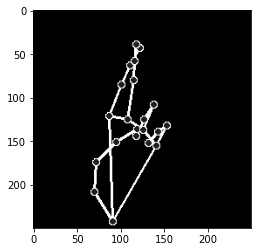

In [10]:
plt.imshow(np.resize(hands_tracked[50],(250,250)),cmap='gray')

In [11]:
np.save('hands-tracking-data',hands_tracked)

### hand tracking test data

In [12]:
test = np.load('Other signs/testing-data.npy',allow_pickle=True)
tracker = handTracker()
hands_tracked = []
for i in np.copy(test):
    hands_tracked.append(np.resize(tracker.handsFinder(i)[1],(250,250,1)))

hands_tracked = np.array(hands_tracked,dtype='float32')

In [13]:
hands_tracked.shape

(146, 250, 250, 1)

In [14]:
np.save('hands-tracking-test',hands_tracked)

### implementation of hand tracking model

In [4]:
cap = cv.VideoCapture(0)
tracker = handTracker()

while True:
    success,image = cap.read()
    image, black = tracker.handsFinder(image,bgr=True)

    cv.imshow("Video",black)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv.destroyAllWindows()

NameError: name 'mp' is not defined